* **scikit-learn 불러오기**

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

* 데이터 불러오기

In [ ]:
import seaborn as sns

df_peng = sns.load_dataset("penguins")          # data 불러오기
df_peng = df_peng.dropna()                      # 결측치 제거

print(f"# shape of dataset: {df_peng.shape}")   # shape 확인
display(df_peng.head(3))                        # data 확인

# shape of dataset: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


* $X$, $y$ 분리

In [ ]:
y = df_peng["body_mass_g"]                      # y feature 추출
X = df_peng.drop("body_mass_g", axis=1)         # 전체 - y = X

In [ ]:
X.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,39.1,18.7,181.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,Male


* train, test 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(f"전체 데이터 수 = {X.shape[0]}")
print(f"train set 데이터 수 = {X_train.shape[0]}")
print(f"test set 데이터 수 = {X_test.shape[0]}")

전체 데이터 수 = 333
train set 데이터 수 = 266
test set 데이터 수 = 67


* **one-hot encoder 예제**

In [ ]:
# 라이브러리 사용
from sklearn.preprocessing import OneHotEncoder

# 예제 데이터 1
data_sample1 = [["Apple"], 
                ["Banana"], 
                ["Cherry"]]

# 예제 데이터 1 OneHotEncoder 학습 & 변환
ohe = OneHotEncoder()                           # one-hot encoder 생성
s_ohe1 = ohe.fit_transform(data_sample1)        # 학습(fit) 후 변환(transform)
print(s_ohe1.toarray())                         # 출력

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# 예제 데이터 2 
data_sample2 = [["Banana"]]

# 예제 데이터 2 OneHotEncoder 변환
s_ohe2 = ohe.transform(data_sample2)            # 학습(fit) 없이 변환(transform)
print(s_ohe2.toarray())                         # 출력

[[0. 1. 0.]]


* **펭귄 데이터 중 categorical data에 one-hot encoding 적용**

In [ ]:
# 펭귄 데이터
cols_category = ["species", "island", "sex"]            # 변환 대상
X_train[cols_category].head(5)                          # 일부 확인

,species,island,sex
296,Gentoo,Biscoe,Female
110,Adelie,Biscoe,Female
145,Adelie,Dream,Male
303,Gentoo,Biscoe,Male
245,Gentoo,Biscoe,Male


In [ ]:
ohe = OneHotEncoder()                                   # one-hot encoder 생성
X_train_ohe = ohe.fit_transform(X_train[cols_category]) # 학습 & 변환                    
print(X_train_ohe.toarray()[:5])                        # 일부 확인

[[0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1.]]


In [ ]:
X_test_ohe = ohe.transform(X_test[cols_category])        # 학습 없이 변환만.
print(X_test_ohe.toarray()[:5])                          # 일부 확인

[[0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1.]]


* **펭귄 데이터 중 numerical data에 standard scaler 적용**

In [ ]:
cols_numerical = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]   # 변환 대상
X_train[cols_numerical].head(5)                                             # 일부 확인

,bill_length_mm,bill_depth_mm,flipper_length_mm
296,47.5,14.2,209.0
110,38.1,16.5,198.0
145,39.0,18.7,185.0
303,50.0,15.9,224.0
245,46.1,15.1,215.0


In [ ]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()                                            # standard scaler 생성
X_train_std = stdscaler.fit_transform(X_train[cols_numerical])          # 학습 & 변환
print(X_train_std[:5])                                                  # 일부 확인

[[ 0.68594319 -1.56944147  0.6156222 ]
 [-1.0244002  -0.39562204 -0.17790668]
 [-0.86064392  0.72716176 -1.11571354]
 [ 1.14082175 -0.70183581  1.69770704]
 [ 0.4312112  -1.11012082  1.04845614]]


In [ ]:
X_test_std = stdscaler.transform(X_test[cols_numerical])                # 학습 & 변환
print(X_test_std[:5])                                                   # 일부 확인

[[ 0.64955291 -1.00804957  1.55342906]
 [ 0.01272292 -1.72254835  0.54348321]
 [-0.64230221 -0.14044391 -1.76496445]
 [ 0.68594319 -1.67151272  0.83203917]
 [ 1.5047246   0.88026864 -0.25004567]]


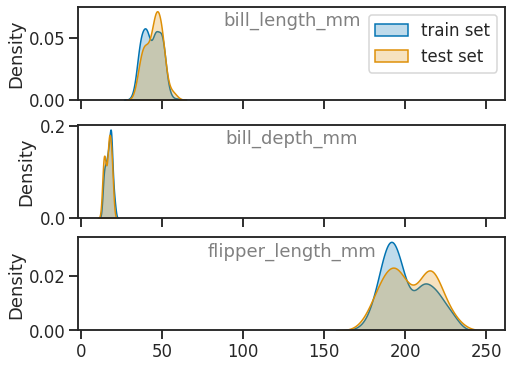

In [ ]:
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_context("talk")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, figsize=(7, 5), constrained_layout=True, sharex=True)
for ax, col in zip(axs, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]):
    sns.kdeplot(x=col, data=X_train, fill=True, ax=ax, label="train set")
    sns.kdeplot(x=col, data=X_test, fill=True, ax=ax, label="test set")
    ax.text(0.5, 0.8, col, ha="center", transform=ax.transAxes, color="gray")
    ax.set_xlabel("")

axs[0].legend()

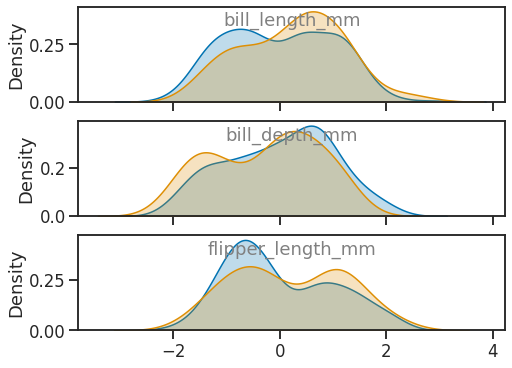

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(7, 5), constrained_layout=True, sharex=True)
for i, ax in enumerate(axs):
    sns.kdeplot(X_train_std[:, i], fill=True, ax=ax)
    sns.kdeplot(X_test_std[:, i], fill=True, ax=ax)
    ax.text(0.5, 0.8, cols_numerical[i], ha="center", transform=ax.transAxes, color="gray")
    ax.set_xlabel("")

* **one-hot encoding을 거친 categorical data와 standard scaling된 numerical data 결합**

In [ ]:
# categorical data
X_train_ohe.toarray().shape

(266, 8)

In [ ]:
# numerical data
X_train_std.shape

(266, 3)

In [ ]:
# 두 데이터 결합

import numpy as np

X_train_c = np.concatenate([X_train_ohe.toarray(), X_train_std], axis=1)    # train set 결합
X_test_c = np.concatenate([X_test_ohe.toarray(), X_test_std], axis=1)       # test set 결합
print(X_train_c.shape)

(266, 11)


* **머신 러닝 모델 학습**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()            # 머신 러닝 모델 선택 : Random Forest Regressor
rf.fit(X_train_c, y_train)              # 머신 러닝 모델 학습

y_train_pred = rf.predict(X_train_c)    # 학습 X 데이터로 y 예측
y_test_pred = rf.predict(X_test_c)      # 평가 X 데이터로 y 예측

print(f"# R2_train = {r2_score(y_train, y_train_pred):.03f}")   # 학습 데이터 R2
print(f"# R2_val = {r2_score(y_test, y_test_pred):.03f}")       # 평가 데이터 R2

# R2_train = 0.980
# R2_val = 0.862


In [ ]:
# 예측 결과 시각화 (함수)

def plot_parity(X_train, X_val, y_train, y_val, model):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True,
                            sharex=True, sharey=True)

    y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
    r2_train, r2_val = r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)

    for (ax, y_true, y_pred, c, r2, label) in zip(axs, [y_train, y_val], [y_train_pred, y_val_pred], ["g", "m"], [r2_train, r2_val], ["train", "validation"]):
        ax.scatter(y_true, y_pred, c=c, label=f"R2={r2:.3f}", alpha=0.5)
        ax.legend(loc="lower right")
        ax.set_xlabel("true")
        ax.set_title(f"{label}", fontsize=20, color="gray", pad=12)
        
        if ax == axs[0]:
            ax.set_ylabel("predict", labelpad=12)

        ymin = min(y_train.min(), y_val.min())

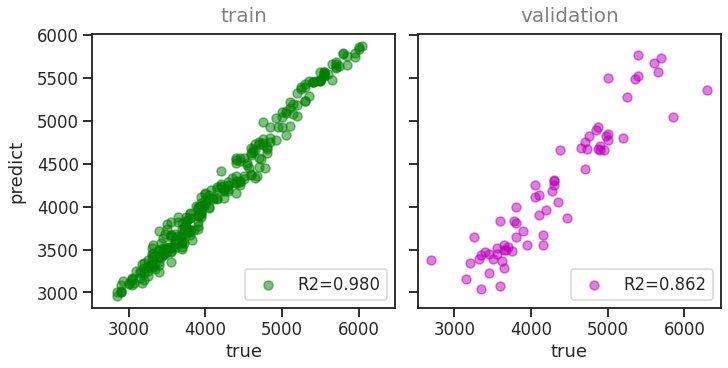

In [ ]:
plot_parity(X_train_c, X_test_c, y_train, y_test, rf) # 예측 성능 시각화

* **순열 중요도(permutation importance)**

In [ ]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(rf, X_train_c, y_train, n_repeats=30)

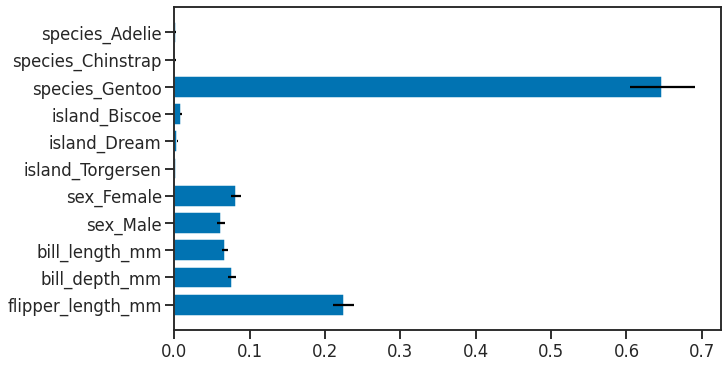

In [ ]:
column_names = ["species_Adelie", "species_Chinstrap", "species_Gentoo", "island_Biscoe", "island_Dream", "island_Torgersen", "sex_Female", "sex_Male"] + cols_numerical
column_names

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(column_names, pi.importances_mean, xerr=pi.importances_std)
ax.invert_yaxis()

In [ ]:
print(X_train_c[:10])

[[ 0.          0.          1.          1.          0.          0.
   1.          0.          0.68594319 -1.56944147  0.6156222 ]
 [ 1.          0.          0.          1.          0.          0.
   1.          0.         -1.0244002  -0.39562204 -0.17790668]
 [ 1.          0.          0.          0.          1.          0.
   0.          1.         -0.86064392  0.72716176 -1.11571354]
 [ 0.          0.          1.          1.          0.          0.
   0.          1.          1.14082175 -0.70183581  1.69770704]
 [ 0.          0.          1.          1.          0.          0.
   0.          1.          0.4312112  -1.11012082  1.04845614]
 [ 1.          0.          0.          0.          0.          1.
   0.          1.         -0.15103336  0.16576986 -0.32218466]
 [ 1.          0.          0.          1.          0.          0.
   1.          0.         -1.53386419  0.82923301 -0.97143556]
 [ 0.          1.          0.          0.          1.          0.
   1.          0.         -0.24

In [ ]:
X_train.iloc[:10]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
296,Gentoo,Biscoe,47.5,14.2,209.0,Female
110,Adelie,Biscoe,38.1,16.5,198.0,Female
145,Adelie,Dream,39.0,18.7,185.0,Male
303,Gentoo,Biscoe,50.0,15.9,224.0,Male
245,Gentoo,Biscoe,46.1,15.1,215.0,Male
81,Adelie,Torgersen,42.9,17.6,196.0,Male
25,Adelie,Biscoe,35.3,18.9,187.0,Female
172,Chinstrap,Dream,42.4,17.3,181.0,Female
269,Gentoo,Biscoe,45.2,15.8,215.0,Male
252,Gentoo,Biscoe,45.1,14.5,207.0,Female


* **pipeline 구축**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1-1.categorical feature에 one-hot encoding 적용
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder()

# 1-2.numerical feature는 standard scaler 적용
num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
num_transformer = StandardScaler()

# 2. 인자 종류별 전처리 적용
preprocessor = ColumnTransformer([("cat", cat_transformer, cat_features), 
                                  ("num", num_transformer, num_features)])

# 3. 전처리 후 랜덤포레스트 적용
pipeline = Pipeline(steps=[("preprocessor", preprocessor), 
                           ("rf", RandomForestRegressor())])

In [ ]:
from sklearn import set_config

set_config(display='diagram') 
pipeline.fit(X_train, y_train)      # X_train_c 아닙니다. 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('rf', RandomForestRegressor())])

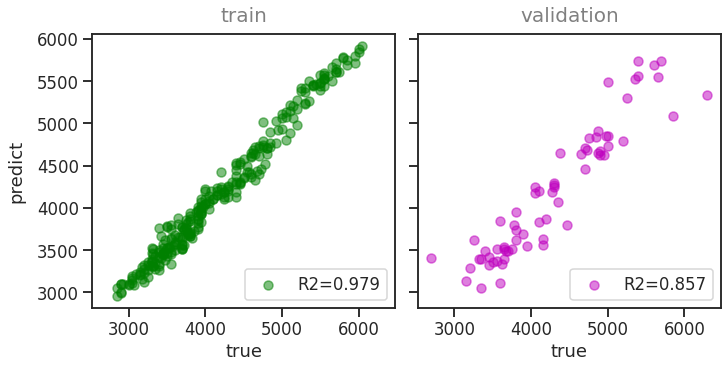

In [ ]:
plot_parity(X_train, X_test, y_train, y_test, pipeline)     # pipeline 학습, 성능 평가

<BarContainer object of 6 artists>

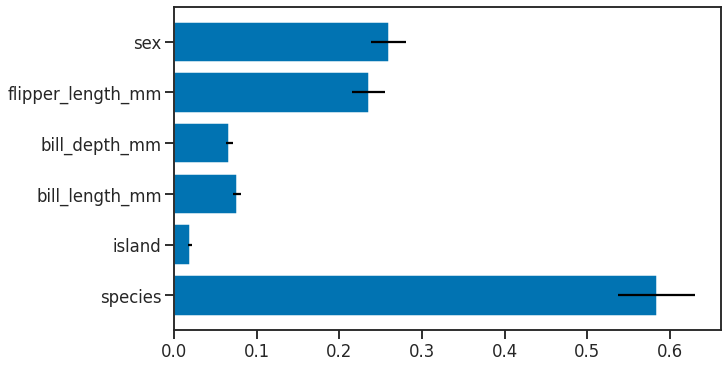

In [ ]:
pi = permutation_importance(pipeline, X_train, y_train, n_repeats=30)

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)

* **캘리포니아 집값 예측**

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
import pandas as pd

X = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y = housing["target"]
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])